In [3]:
from sys import stdin
import numpy as np # linear algebra
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn import metrics

# Load the data
data = pd.read_csv("FlightDelays.csv")

print("The number of rows in the data set is {}.".format(len(data)))
print("The number of features is {}.".format(len(data.columns)))

data.head()

/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


The number of rows in the data set is 450017.
The number of features is 12.


,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,AIRLINE_ID,FL_NUM,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,SCHED_DEP_TIME,SCHED_ARR_TIME,DELAY
0,2017,1,1,7,6,19805,1766,11298,12889,1055,1154,0.0
1,2017,1,1,8,7,19805,1766,11298,12889,1055,1154,0.0
2,2017,1,1,1,7,19805,1766,13930,11298,710,948,0.0
3,2017,1,1,2,1,19805,1766,13930,11298,710,948,0.0
4,2017,1,1,3,2,19805,1766,13930,11298,710,948,0.0


In [4]:
# Finding Null Values
data.isnull().sum()

YEAR                    0
QUARTER                 0
MONTH                   0
DAY_OF_MONTH            0
DAY_OF_WEEK             0
AIRLINE_ID              0
FL_NUM                  0
ORIGIN_AIRPORT_ID       0
DEST_AIRPORT_ID         0
SCHED_DEP_TIME          0
SCHED_ARR_TIME          0
DELAY                8541
dtype: int64

In [5]:
new_data = data.dropna(axis=0)#Delete the rows containing missing data
new_data.isnull().sum() #Check to make sure there are no more NaNs

YEAR                 0
QUARTER              0
MONTH                0
DAY_OF_MONTH         0
DAY_OF_WEEK          0
AIRLINE_ID           0
FL_NUM               0
ORIGIN_AIRPORT_ID    0
DEST_AIRPORT_ID      0
SCHED_DEP_TIME       0
SCHED_ARR_TIME       0
DELAY                0
dtype: int64

In [6]:
print("The number of rows in the new data set is {}.".format(len(new_data)))

The number of rows in the new data set is 441476.


In [7]:
#subset the flight that delayed
delay_flight=new_data[new_data.DELAY==1]
print(delay_flight)

        YEAR  QUARTER  MONTH  DAY_OF_MONTH  DAY_OF_WEEK  AIRLINE_ID  FL_NUM  \
22      2017        1      1             2            1       19805    1767   
24      2017        1      1             4            3       19805    1767   
26      2017        1      1             6            5       19805    1767   
45      2017        1      1            10            2       19805    1768   
64      2017        1      1            29            7       19805    1768   
67      2017        1      1             9            1       19805    1769   
78      2017        1      1            23            1       19805    1769   
80      2017        1      1            25            3       19805    1769   
82      2017        1      1            27            5       19805    1769   
91      2017        1      1            16            1       19805    1769   
98      2017        1      1            25            3       19805    1769   
109     2017        1      1             7          

In [8]:
#exploring most five airport delay
most5_Airport_delay=delay_flight.groupby('ORIGIN_AIRPORT_ID').DELAY.sum().nlargest(5)
print(most5_Airport_delay)


ORIGIN_AIRPORT_ID
10397    6176.0
12892    5453.0
13930    4202.0
11292    4179.0
14771    3831.0
Name: DELAY, dtype: float64


In [9]:
#cleaning data keeping only most five airport delay 
data_5most_airport=new_data.loc[new_data['ORIGIN_AIRPORT_ID'].isin(['10397', '12892', '13930','11292','14771'])] 
print(data_5most_airport)

        YEAR  QUARTER  MONTH  DAY_OF_MONTH  DAY_OF_WEEK  AIRLINE_ID  FL_NUM  \
2       2017        1      1             1            7       19805    1766   
3       2017        1      1             2            1       19805    1766   
4       2017        1      1             3            2       19805    1766   
5       2017        1      1             4            3       19805    1766   
6       2017        1      1             5            4       19805    1766   
7       2017        1      1             6            5       19805    1766   
8       2017        1      1             7            6       19805    1766   
9       2017        1      1             8            7       19805    1766   
595     2017        1      1             1            7       19805    1783   
596     2017        1      1             2            1       19805    1783   
597     2017        1      1             3            2       19805    1783   
598     2017        1      1             4          

In [10]:
data=data_5most_airport

In [11]:
print("The number of rows in the new data set is {}.".format(len(data)))

The number of rows in the new data set is 94627.


In [12]:
# Setting the train set,test set, and validation set
x= new_data.iloc[:,0:11]
y= new_data['DELAY']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.2, random_state = 1)
x_train,x_val,y_train,y_val = train_test_split(x_train,y_train,test_size=.25, random_state = 1)

In [24]:
# Setting the train set,test set, and validation set
x= new_data.iloc[:,0:11]
y= new_data['DELAY']

,x_test,y_train,y_test = train_test_split(x,y,test_size=.2, random_state = 1)
x_train,x_val,y_train,y_val = train_test_split(x_train,y_train,test_size=.25, random_state = 1)

In [13]:
x_train.shape

(264885, 11)

In [14]:
x_test.shape

(88296, 11)

In [15]:
x_val.shape

(88295, 11)

In [40]:
from sklearn.linear_model import LogisticRegression as lg

from sklearn.metrics import classification_report
model=lg()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
acc=metrics.accuracy_score(y_test,y_pred)

In [23]:
null_acc=max(y_test.mean(),1-y_test.mean())
print(null_acc)
print("True: ",y_test.values[0:25])
print("Pred: ",y_pred[0:25])


0.7890957687777476
True:  [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0.
 0.]
Pred:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


In [44]:
confusion_matrix=metrics.confusion_matrix(y_pred,y_test)
confusion_matrix

array([[69541, 18560],
       [  133,    62]])

In [45]:
TP=confusion_matrix[1,1]
TN=confusion_matrix[0,0]
FP=confusion_matrix[0,1]
FN=confusion_matrix[1,0]
print("TP: ",TP ,"TN: ",TN ,"FP: ",FP ,"FN: ",FN)

TP:  62 TN:  69541 FP:  18560 FN:  133


In [46]:
Accuracy=(TP+TN)/float(TP+TN+FP+FN)
Miss_classification_rate=(FP+FN)/float(TP+TN+FP+FN)
TPR=TP/float(TP+FN)
TNR=TN/float(TN+FP)
FPR=FP/float(TN+FP)
FNR=FN/float(TP+FN)
Precision=TP/float(TP+FP)
print("TP: ",TP ,"TN: ",TN ,"FP: ",FP ,"FN: ",FN)
print("Accuracy: ", Accuracy*100,"vs",acc*100)
print("Miss-classification Rate: ", Miss_classification_rate*100)
print("TPR: ",TPR*100)
print("TNR: ",TNR*100)
print("FPR: ",FPR*100)
print("FNR: ",FNR*100)
print("Precision: ", Precision)

print(classification_report(y_test, y_pred, target_names=['class 0', 'Class 1'] ))

TP:  62 TN:  69541 FP:  18560 FN:  133
Accuracy:  78.82916553411253 vs 78.82916553411253
Miss-classification Rate:  21.17083446588747
TPR:  31.794871794871792
TNR:  78.93326976992316
FPR:  21.066730230076843
FNR:  68.2051282051282
Precision:  0.0033293953388465257
             precision    recall  f1-score   support

    class 0       0.79      1.00      0.88     69674
    Class 1       0.32      0.00      0.01     18622

avg / total       0.69      0.79      0.70     88296



In [42]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [31]:

print(data.shape)
print(list(data.columns))

(94627, 12)
['YEAR', 'QUARTER', 'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'AIRLINE_ID', 'FL_NUM', 'ORIGIN_AIRPORT_ID', 'DEST_AIRPORT_ID', 'SCHED_DEP_TIME', 'SCHED_ARR_TIME', 'DELAY']


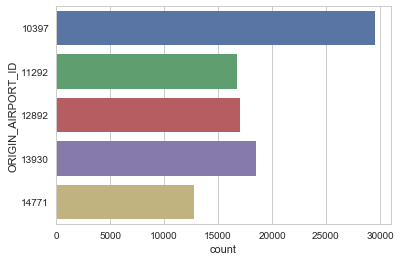

In [34]:
sns.countplot(y="ORIGIN_AIRPORT_ID", data=data)
plt.show()